In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('../../Datasets/A-Z_Alphabets_Recognition/A_Z Handwritten Data.csv')

In [3]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(372450, 785)

In [5]:
y=df['0']
X=df.drop('0',axis=1)

In [6]:
X.shape

(372450, 784)

In [7]:
np.array(X.iloc[0]).reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   2, 177, 255, 188,  13,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 130, 255, 255, 255, 161,   0,   0,   0,   0,   0,
          0,   0],
       [  

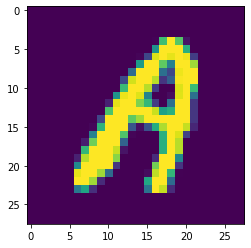

In [8]:
img0=np.array(X.iloc[0]).reshape(28,28)
plt.imshow(img0)

In [9]:
X_scaled=X/255

In [10]:
y

0          0
1          0
2          0
3          0
4          0
          ..
372445    25
372446    25
372447    25
372448    25
372449    25
Name: 0, Length: 372450, dtype: int64

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat=to_categorical(y,num_classes=26)

In [13]:
y_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [14]:
y_cat.shape

(372450, 26)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model=Sequential()
model.add(Dense(36, activation='relu',input_shape=(784,)))
model.add(Dense(36,activation='relu'))
model.add(Dense(26,activation='softmax'))

In [17]:
model.compile(loss='categorical_crossentropy',metrics=['Accuracy'])

In [18]:
hist=model.fit(X_scaled,y_cat,epochs=10, batch_size=64)

Epoch 1/10
5820/5820 [==============================] - 17s 3ms/step - loss: 0.4181 - Accuracy: 0.8857
Epoch 2/10
5820/5820 [==============================] - 16s 3ms/step - loss: 0.2157 - Accuracy: 0.9404
Epoch 3/10
5820/5820 [==============================] - 16s 3ms/step - loss: 0.1873 - Accuracy: 0.9485
Epoch 4/10
5820/5820 [==============================] - 16s 3ms/step - loss: 0.1731 - Accuracy: 0.9530
Epoch 5/10
5820/5820 [==============================] - 16s 3ms/step - loss: 0.1649 - Accuracy: 0.9554
Epoch 6/10
5820/5820 [==============================] - 16s 3ms/step - loss: 0.1597 - Accuracy: 0.9571
Epoch 7/10
5820/5820 [==============================] - 16s 3ms/step - loss: 0.1564 - Accuracy: 0.9586
Epoch 8/10
5820/5820 [==============================] - 16s 3ms/step - loss: 0.1539 - Accuracy: 0.9592
Epoch 9/10
5820/5820 [==============================] - 16s 3ms/step - loss: 0.1519 - Accuracy: 0.9599
Epoch 10/10
5820/5820 [==============================] - 16s 3ms/step - l

In [19]:
model.predict(X_scaled.iloc[:10,:]).argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)